# Intrinsic performance metrics for Enron graph

In [1]:
import os
os.chdir('..')
print(os.getcwd())

import pickle
from tigger_package.orchestrator import Orchestrator
from tigger_package.metrics.distribution_metrics import NodeDistributionMetrics, EdgeDistributionMetrics
from tigger_package.tools import plot_adj_matrix
import networkx as nx 
import pandas as pd
import time

/Users/tonpoppe/workspace/tigger_adj_rep/tigger_adj
loaded


In [2]:
enron_folder = "data/enron/"
orchestrator = Orchestrator(enron_folder)
nodes = orchestrator._load_nodes()
synth_nodes = pd.read_parquet('data/enron/synth_graph/node_attributes_final.parquet')

edges = orchestrator._load_edges()
synth_edges = pd.read_parquet('data/enron/synth_graph/adjacency_final_v2.parquet')
print(f"orig has {edges.shape} format and synth edges {synth_edges.shape}")



orig has (2689, 10) format and synth edges (402, 10)


# plot graphs

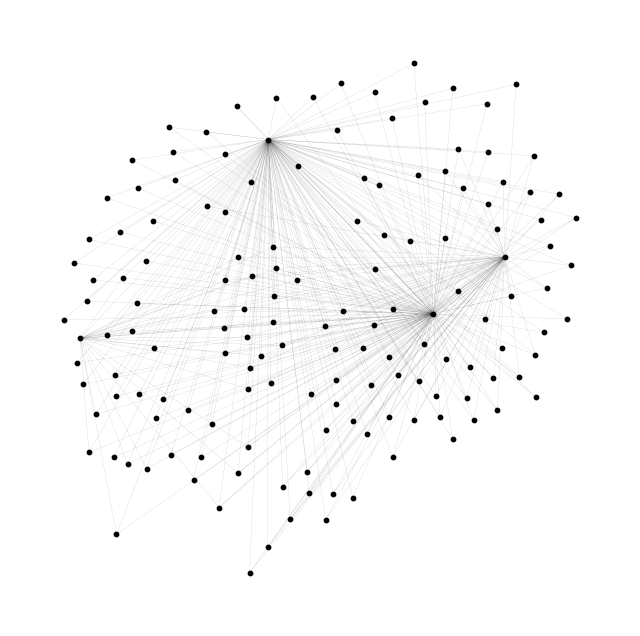

In [3]:
plot_adj_matrix(synth_edges)

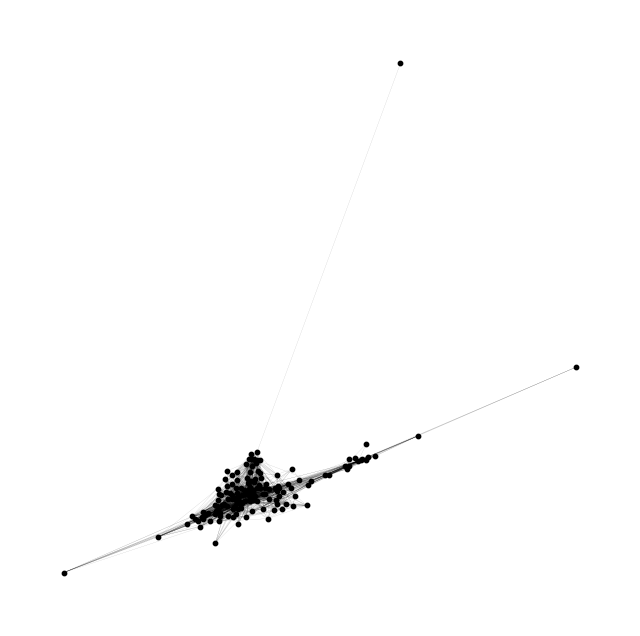

In [4]:
plot_adj_matrix(edges.rename(columns={'start': 'src', 'end': 'dst'}))

# node attributes

In [5]:
ndm = NodeDistributionMetrics(nodes, synth_nodes)
ndm.calculate_wasserstein_distance()

,value,type,metric
attr_received_size,0.016905,node_attributes,Wasserstein_distance
attr_cnt_to,0.034091,node_attributes,Wasserstein_distance
attr_cnt_cc,0.038219,node_attributes,Wasserstein_distance
attr_sent_size,0.019251,node_attributes,Wasserstein_distance
attr_cnt_send,0.038412,node_attributes,Wasserstein_distance


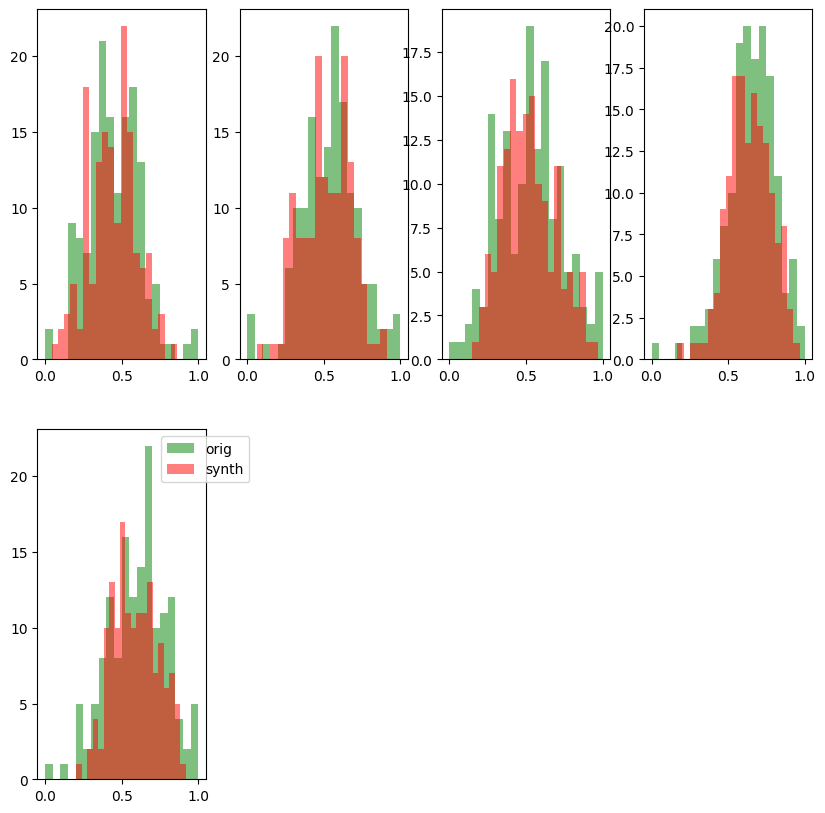

In [6]:
ndm.plot_hist()

# Edge atributes

In [7]:
edm = EdgeDistributionMetrics(edges, synth_edges)
edm.calculate_wasserstein_distance()


,value,type,metric
cnt_forward,0.124048,edge_attributes,Wasserstein_distance
size,0.084618,edge_attributes,Wasserstein_distance
cnt_reply,0.101679,edge_attributes,Wasserstein_distance
cnt_cc,0.100926,edge_attributes,Wasserstein_distance
size_to,0.102023,edge_attributes,Wasserstein_distance
avg_cc_addressees,0.128206,edge_attributes,Wasserstein_distance
weight,0.106862,edge_attributes,Wasserstein_distance
avg_to_addressees,0.164006,edge_attributes,Wasserstein_distance


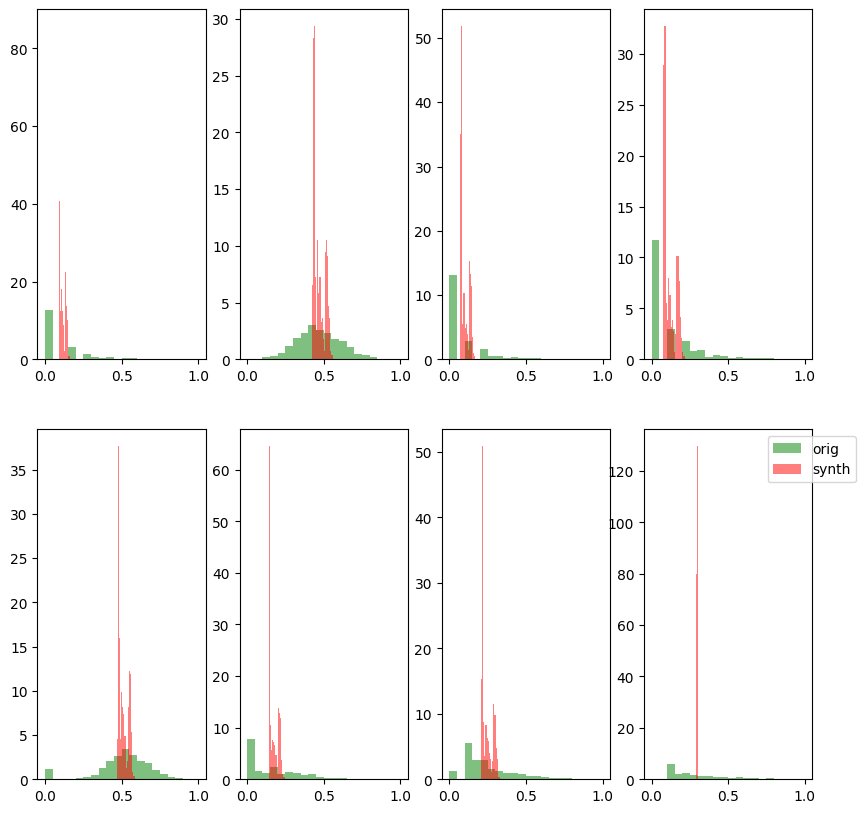

In [8]:
edm.plot_hist()


In [9]:
edm.get_degree_wasserstein_distance()


,value,type,metric
in_degree,3.717949,edge_degree,Wasserstein_distance
out_degree,5.581395,edge_degree,Wasserstein_distance


/Users/tonpoppe/anaconda3/envs/tg_geo/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/Users/tonpoppe/anaconda3/envs/tg_geo/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/Users/tonpoppe/workspace/tigger_adj_rep/tigger_adj/tigger_package/metrics/distribution_metrics.py:150: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


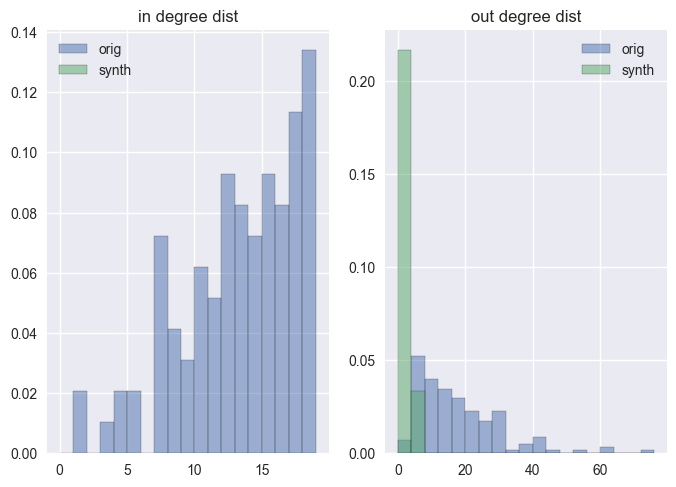

In [10]:
edm.plot_degree_dst()

# check clustering

/Users/tonpoppe/workspace/tigger_adj_rep/tigger_adj/tigger_package/inductive_controller.py:231: UserWarning: feat df has 150 rows and vocab has 151 instead of 152. This can be cause by unconnected nodes.
  warnings.warn(f"feat df has {nodes.shape[0]} rows and vocab has {node_attr.shape[0]} instead of {nodes.shape[0] + 2}. This can be cause by unconnected nodes.")
/Users/tonpoppe/anaconda3/envs/tg_geo/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


  0%|          | 0/2689 [00:00<?, ?it/s]

Number of components, 18


/Users/tonpoppe/anaconda3/envs/tg_geo/lib/python3.11/site-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Text(0.5, 1.0, 'distribution of cluster id in the enron data set')

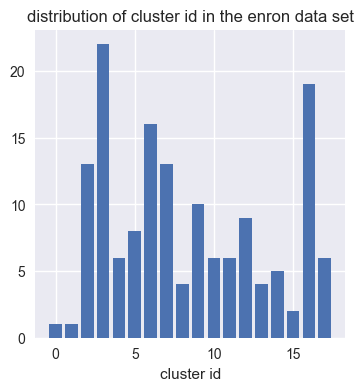

In [11]:
import matplotlib.pyplot as plt
import numpy as np
enron_folder = "data/enron/"
orchestrator = Orchestrator(enron_folder)
orchestrator.init_lstm()
inductiveController = orchestrator.inductiveController
cl = inductiveController.cluster_labels
cl_id, height = np.unique(cl, return_counts=True)
plt.figure(figsize=(4,4))
plt.bar(cl_id, height)
plt.xlabel("cluster id")
plt.title("distribution of cluster id in the enron data set")


In [12]:
edges

,start,end,cnt_forward,size,cnt_reply,cnt_cc,size_to,avg_cc_addressees,weight,avg_to_addressees
0,0,98,0.000000,0.248241,0.000000,0.000000,0.362312,0.000000,0.162562,0.101141
1,0,55,0.369416,0.559061,0.347989,0.213427,0.619975,0.041848,0.390503,0.163511
2,0,24,0.000000,0.160284,0.000000,0.000000,0.286642,0.000000,0.102565,0.320608
3,0,34,0.000000,0.145250,0.000000,0.000000,0.273708,0.000000,0.102565,0.101141
4,0,45,0.000000,0.396815,0.000000,0.134657,0.463455,0.066032,0.162562,0.234841
...,...,...,...,...,...,...,...,...,...,...
2684,149,147,0.570363,0.851650,0.387410,0.617398,0.877893,0.080143,0.883572,0.357292
2685,149,107,0.000000,0.665403,0.149871,0.526091,0.697617,0.165850,0.590253,0.311626
2686,149,61,0.000000,0.431966,0.000000,0.000000,0.520372,0.000000,0.102565,0.101141
2687,149,97,0.000000,0.340674,0.000000,0.134657,0.000000,0.369416,0.000000,0.160304


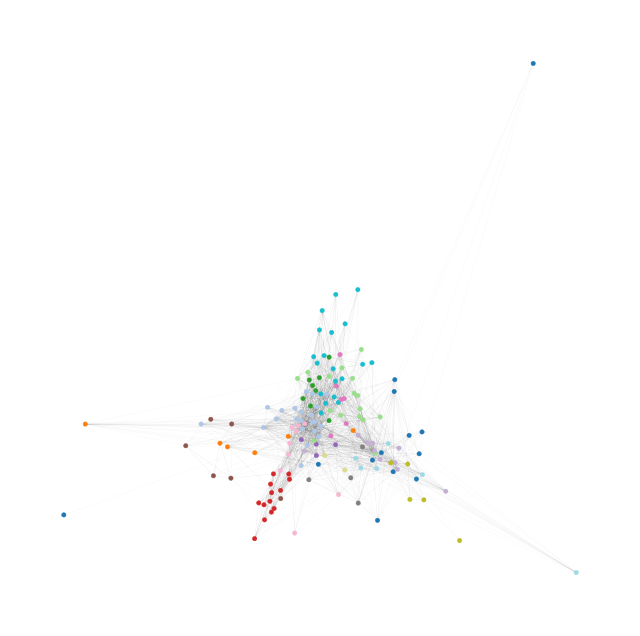

In [13]:
# Create dataframe with node_id as index and cluster_id
vocab = inductiveController.vocab
cl_orig_id = {k : cl[v] for k, v in vocab.items()}
cl_orig_id.pop('<PAD>')
cl_orig_id.pop('end_node')
cluster_df = pd.DataFrame.from_dict(cl_orig_id, orient='index', columns=['cluster_id']) 

G = nx.from_pandas_edgelist(edges, source='start', target='end', edge_attr=['weight'], create_using=nx.DiGraph)
for n in G.nodes():
    G.nodes[n]['cluster'] = cluster_df.loc[n]
       
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, width=0.1, arrows=False, alpha=0.1)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=list(cluster_df.index),
    node_size=10,
    node_color=list(cluster_df['cluster_id']),
    cmap=plt.cm.tab20,
)

plt.axis("off")
plt.show() 